#### About
Image keypoints, detectors and descriptors using OpenCV.

> Popular keypoint detector algorithms.
1. Harris corner detector
2. Shi-Tomasi corner detector

> Popular keypoint descriptors
1. SIFT(Scale Invariant Feature Transform) - It is both detector and descriptors 
2. SURF
3. FAST(Feastures from accelerated segment text) algorithm - It's just a detector
4. BRIEF (Binary Robust Independent Elementary Features) - It's just a descriptor.
5. ORB Detector (Oriented FAST and Rotated BRIEF ) - It's combination of detector and descriptor.

In [6]:
#importing modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#pip install opencv-contrib-python


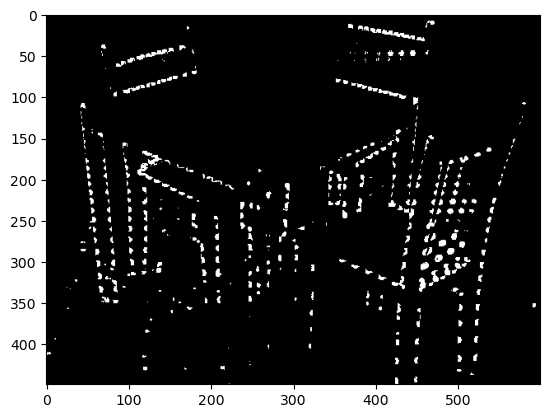

In [7]:
## 1. Harris corner detector
img = cv2.imread('Image.jpg',0)
img = np.float32(img)
corners = cv2.cornerHarris(img,5,3,0.1)
black = np.zeros((img.shape))
black[corners>0.01*corners.max()] =1
plt.imshow(black,cmap='gray')
plt.show()

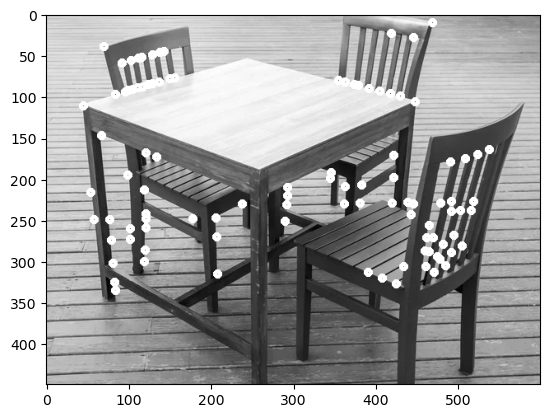

In [9]:
#2. Shi-Tomasi corner detector
corners = cv2.goodFeaturesToTrack(img,100,0.01,4)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,4)

plt.imshow(img,cmap='gray')

In [14]:
#sift algorithm
img = cv2.imread('Image.jpg',0)
img2 = cv2.imread('Image2.png',0)
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(img,None)
keypoints2 = sift.detect(img2,None)

In [16]:
keypoints, descriptors1 = sift.compute(img, keypoints)
keypoints, descriptors2 = sift.compute(img2, keypoints2)



In [17]:
match_percent = 0.02
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = list(matcher.match(descriptors1, descriptors2))

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)
# Remove not so good matches
numGoodMatches = int(len(matches) * match_percent)
matches = matches[:numGoodMatches]

# Draw top matches
imMatches = cv2.drawMatches(
    img, keypoints, img2, keypoints2, matches, None)

In [19]:
cv2.imwrite("matches.jpg", imMatches)

True

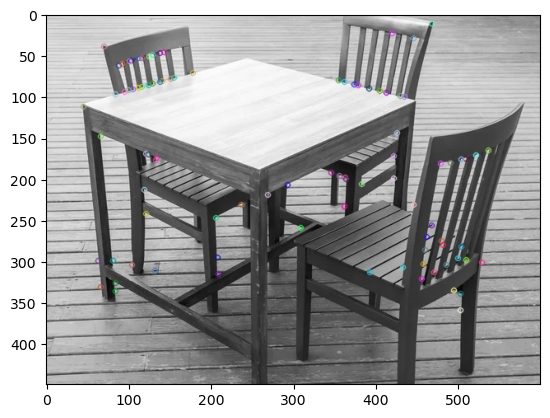

In [20]:
#Fast algorithm
detector = cv2.FastFeatureDetector_create(100)
keypoints = detector.detect(img,None)
detected = cv2.drawKeypoints(img,keypoints,None,flags=0)
plt.imshow(detected)
plt.show()

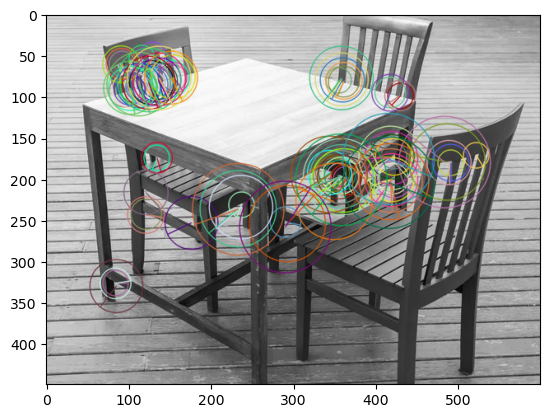

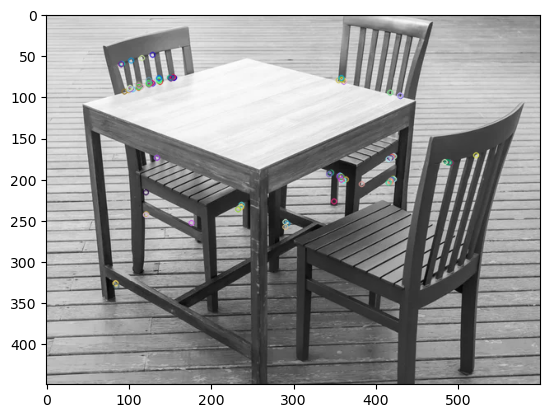

In [25]:
# ORB Detector (Oriented FAST and Rotated BRIEF )
orb = cv2.ORB_create(100)
keypoints,descriptors = orb.detectAndCompute(img,None) #alternatively use detect
detected_kp_descriptors = cv2.drawKeypoints(img,keypoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
detected_kp = cv2.drawKeypoints(img,keypoints,None,flags=None)
plt.imshow(detected_kp_descriptors)
plt.show()
plt.imshow(detected_kp)
plt.show()
#angle shows the direction of keypoints
